In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, BisectingKMeans


from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram

sns.set(rc = {'figure.figsize':(18,10)})

## Ejercicios

1) Calcular a mano los métodos single y average para el siguiente conjunto de puntos:
    D={(1,2),(2,3.4),(1.1,7),(−2,−0.5),(2.2,5),(3.2,3.1),(−1,−1)}.

2) Utilizar otro algoritmo jerárquico aglomerativo para el conjunto de datos USArrest. Luego, descartar la variable UrbanPop y repetir el análisis.

In [3]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [4]:
data = pd.read_csv("usArrest.csv")

df = data.copy()

scaled_data = StandardScaler().fit_transform(df.drop("State", axis = 1))

In [5]:
#hierarquical clustering
hc=AgglomerativeClustering(linkage="ward", 
                            distance_threshold = 0.5,#distancia maxima hasta la cual junta clusters 
                            n_clusters=None)
hc.fit(scaled_data)

AgglomerativeClustering(distance_threshold=0.5, n_clusters=None)

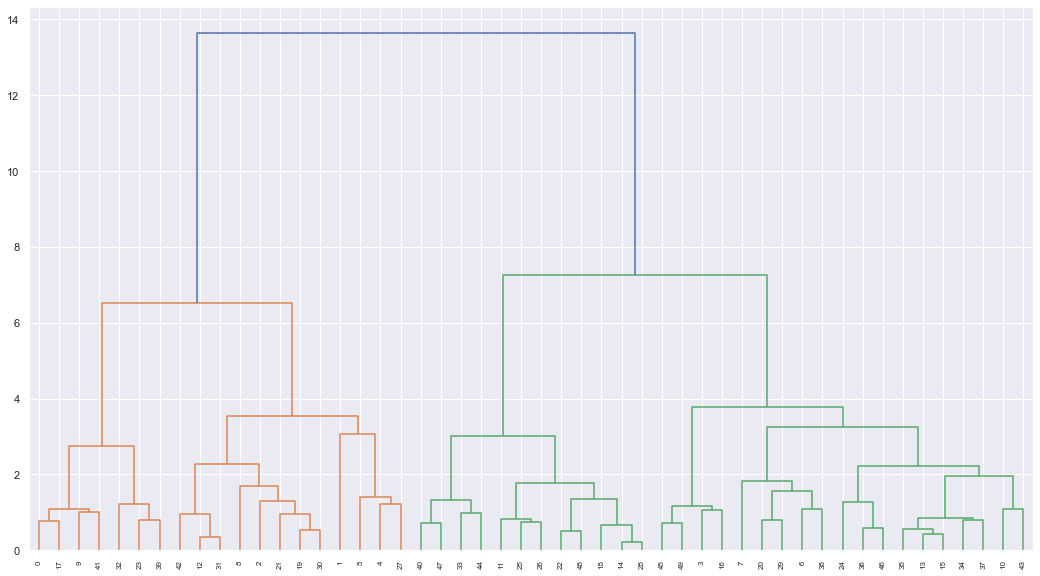

In [6]:
plot_dendrogram(hc)

In [7]:
data_no_pop=df.iloc[:,[1,2,4]]

data_no_pop_scaled = StandardScaler().fit_transform(data_no_pop)

In [8]:
hc_2=AgglomerativeClustering(linkage="ward", 
                            distance_threshold = 0.5,#distancia maxima hasta la cual junta clusters 
                            n_clusters=None)
hc_2.fit(data_no_pop_scaled)

AgglomerativeClustering(distance_threshold=0.5, n_clusters=None)

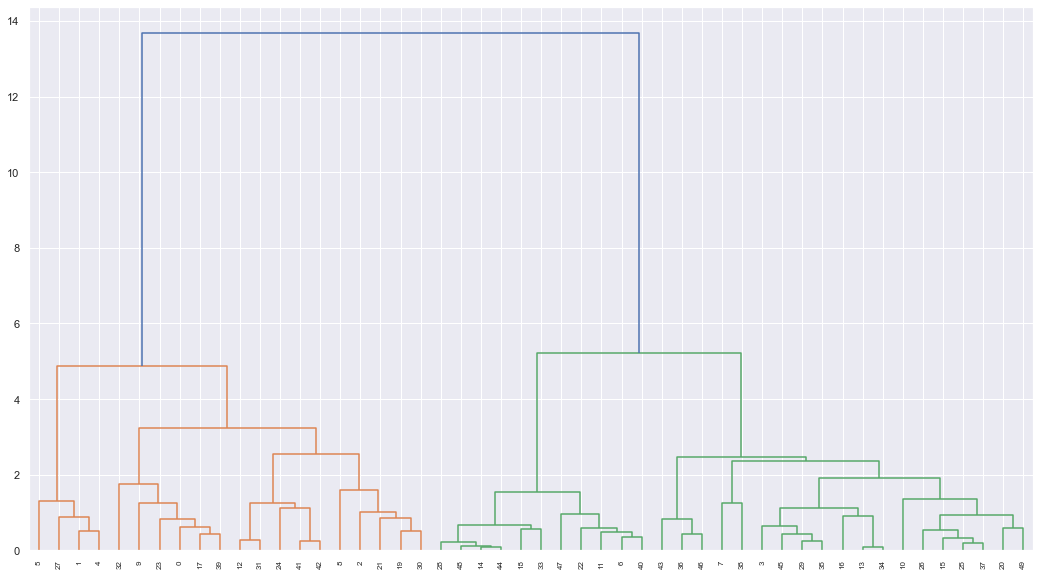

In [9]:
plot_dendrogram(hc_2)

# OUTLIERS ANALYSIS WITH HIERARCHICAL CLUSTERING

In [10]:
df_outlier = df.copy()

df_outlier.loc[4, "Assault"] = 550 # convertimos a CALIFORNIA en outlier
df_outlier.loc[3, "Assault"] = 600
df_outlier.loc[2, "Murder"] = 700

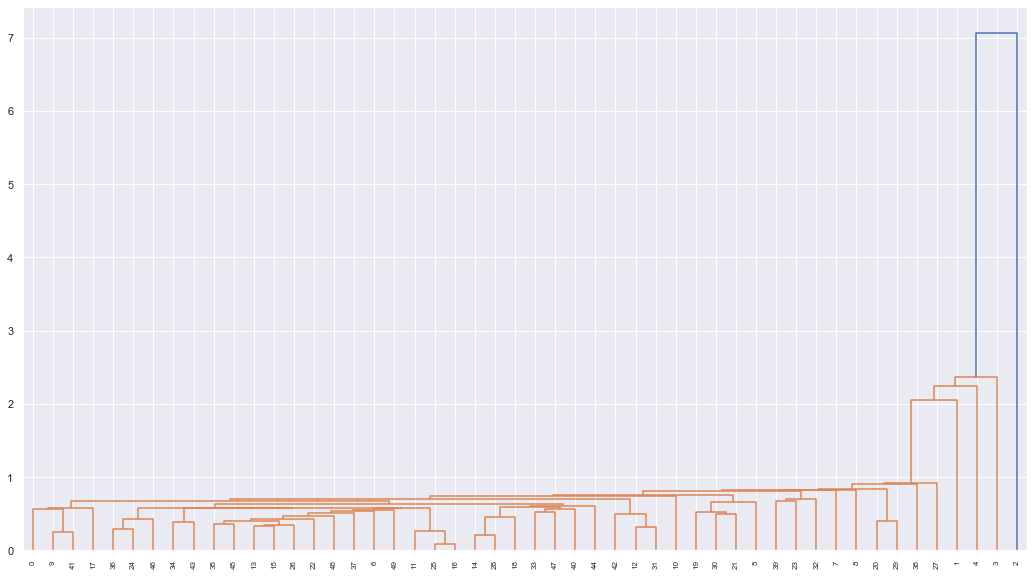

In [11]:
df_outlier_scaled = StandardScaler().fit_transform(df_outlier.iloc[:,1:])

hc_outlier=AgglomerativeClustering(linkage="single", 
                                distance_threshold = 0.5, #distancia maxima hasta la cual junta clusters 
                                n_clusters=None)
hc_outlier.fit(df_outlier_scaled)

plot_dendrogram(hc_outlier)

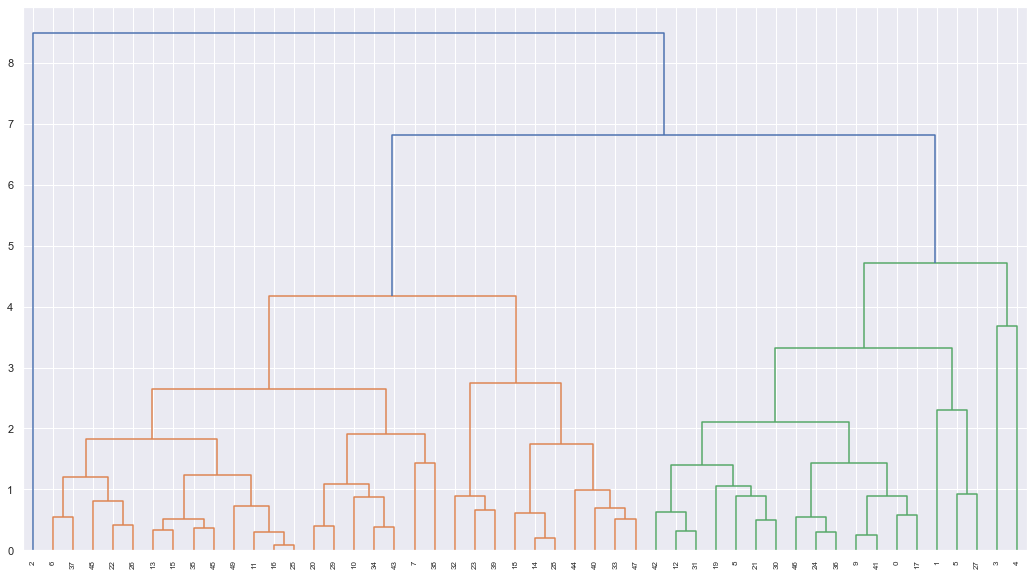

In [12]:
hc_outlier=AgglomerativeClustering(linkage="complete", 
                                distance_threshold = 0.99, #distancia maxima hasta la cual junta clusters 
                                n_clusters=None)
hc_outlier.fit(df_outlier_scaled)
plot_dendrogram(hc_outlier)

Observamos que tanto el likage "simple", como "complete" nos permiten identificar a los outliers en los ultimos clusters. Simple es un poco mas sensible a los mismos.

#### 3) Utilizar un método de cluster jerárquico para el conjunto de datos “Mall_Costumers.csv”. Las descripción de las variables la puede encontrar en Kaggle. Probar el método divisivo Diana.

In [13]:
data_2 = pd.read_csv("Mall_Customers.csv")

df_2 = data_2.copy()
df_2.shape

(200, 5)

In [14]:
df_2_scaled = StandardScaler().fit_transform(df_2.iloc[:,2:])

bisect_means = BisectingKMeans(n_clusters=5, random_state=0).fit(df_2_scaled)

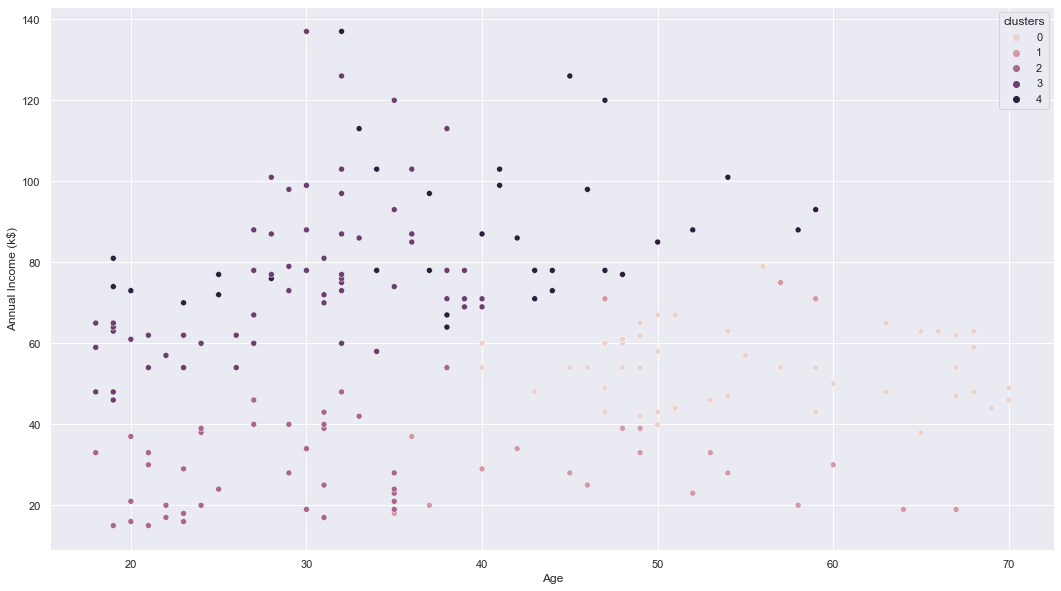

In [15]:
df_2["clusters"]=bisect_means.labels_
sns.scatterplot(data = df_2, y = "Annual Income (k$)", x="Age", hue = "clusters");

In [36]:
lista_ssw = []

for n in range(2,21):
    bkm = BisectingKMeans(n_clusters=n, random_state=0).fit(df_2_scaled)
    df_2["clusters"]=bkm.labels_
    lista_ssw.append(bkm.inertia_)

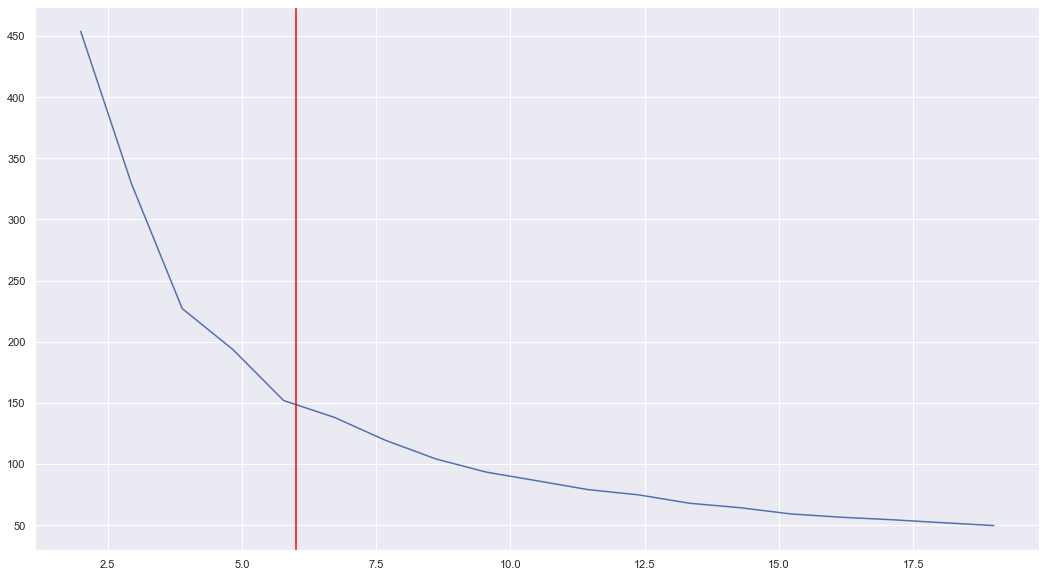

In [40]:
sns.lineplot(x = np.linspace(2,19,19),y= lista_ssw)

plt.axvline(6, color = "red");

encontramos que el mejor valor de numero de clusters parece ser 6, es el que tiene la menor suma de varianzas entre grupos (tomando la edad como segmentador)

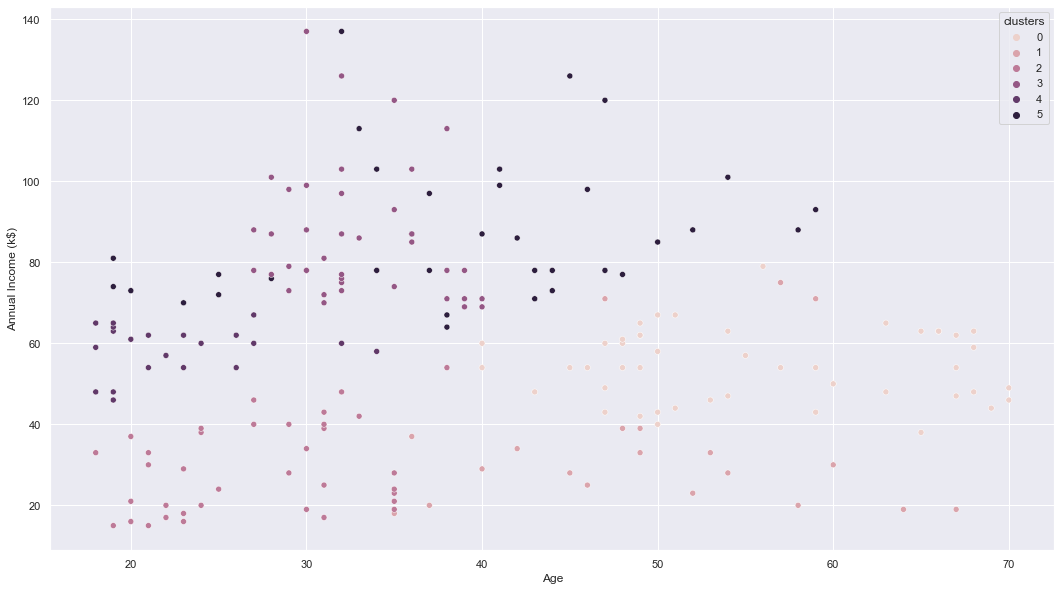

In [41]:

best_bisect_means = BisectingKMeans(n_clusters=6, random_state=0).fit(df_2_scaled)

df_2["clusters"]=best_bisect_means.labels_
sns.scatterplot(data = df_2, y = "Annual Income (k$)", x="Age", hue = "clusters");